# Preamble

In [ ]:
# preamble
base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch
import matplotlib.pyplot as plt
import random

from google.colab import drive

import shutil
import pickle
import os

import time

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


!pip install import-ipynb
import import_ipynb


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight

if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/'  )    

import my_signal_processing


base_directory_data_str =  base_directory_str + '/data/figure3_data'
base_directory_figure_str =  base_directory_str + '/figures/figure3'

if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")


print(device)
plt.rcParams["mathtext.default"]= 'regular'

plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

N_repeat = 30

N_epoch = 2000

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

lr = .002

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=a45684a65892eeffb3007bb5a41637000f1895725904e9844d5421b0a4d5ac5f
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Mounted at /content/gdrive
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
cpu


#  Reinitialize E with N(0,1) at each  iteration




In [ ]:



def activation1(x):
  

  return torch.mul( x >= 0 , x  )

def derivative_activation1(x):

  return (x >= 0) * 1




angle_W1_B_list_random_E = []
angle_dW0_bp_dW0_fa_list_random_E = []

for j in range(N_repeat):

  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input]))


  angle_W1_B_list = []
  angle_dW1_B_list = []





  angle_dW0_bp_dW0_fa_list = []




  angle_dW1_W1_list = []





  norm_dw0_list = []
  angle_W0_change_list = []
  angle_E_change_list = []

  W0_list= []
  for i in range(N_epoch):
    E = torch.randn( [N_batch , N_output] )

    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )



    delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 




  angle_W1_B_list_random_E.append(angle_W1_B_list)

  angle_dW0_bp_dW0_fa_list_random_E .append( angle_dW0_bp_dW0_fa_list )



with open( base_directory_data_str + "/angle_W1_B_list_random_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_list_random_E  , fp)

with open( base_directory_data_str + "//angle_dW0_bp_dW0_fa_list_random_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_dW0_bp_dW0_fa_list_random_E  , fp)





# Reinitialize E every 2 iterations

In [ ]:





angle_W1_B_list_2_it_random_E = []
angle_dW0_bp_dW0_fa_list_2_it_random_E = []

for j in range(N_repeat):

  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input]))



  angle_W1_B_list = []
  angle_dW1_B_list = []




  angle_dW0_bp_dW0_fa_list = []



  angle_dW1_W1_list = []





  norm_dw0_list = []
  angle_W0_change_list = []
  angle_E_change_list = []

  W0_list= []
  for i in range(N_epoch):

    if i % 2 ==0:
      E = torch.randn( [N_batch , N_output] )


    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )



    delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )

    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 

  angle_W1_B_list_2_it_random_E .append( angle_W1_B_list )  

  angle_dW0_bp_dW0_fa_list_2_it_random_E .append( angle_dW0_bp_dW0_fa_list )  



with open(  base_directory_data_str +  "/angle_W1_B_list_2_itr_random_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_list_2_it_random_E  , fp)

with open(  base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_2_itr_random_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_dW0_bp_dW0_fa_list_2_it_random_E  , fp)







# Fixed E and X

In [ ]:




angle_W1_B_fixed_E = []
angle_dW0_bp_dW0_fa_list_fixed_E = []

for j in range(N_repeat):
    
  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input]))






  angle_W1_B_list = []
  angle_dW1_B_list = []




  angle_dW0_bp_dW0_fa_list = []



  angle_dW1_W1_list = []




  norm_dw0_list = []
  angle_W0_change_list = []
  angle_E_change_list = []

  W0_list= []
  E = torch.randn( [N_batch , N_output] )


  for i in range(N_epoch):
  

    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )



    delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 


  angle_W1_B_fixed_E.append( angle_W1_B_list  )

  angle_dW0_bp_dW0_fa_list_fixed_E.append( angle_dW0_bp_dW0_fa_list  )


with open(  base_directory_data_str +  "/angle_W1_B_fixed_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_fixed_E  , fp)

with open(  base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_fixed_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_dW0_bp_dW0_fa_list_fixed_E  , fp)

#  Reinitialize E and X with N(0.5,1) at each  iteration

In [ ]:



def activation1(x):

  return torch.mul( x >= 0 , x  )

def derivative_activation1(x):

  return (x >= 0) * 1




angle_W1_B_list_B_X_E_N_0d5_1= []
angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1 = []

for j in range(N_repeat):
    
  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input])) + 0.5


  angle_W1_B_list = []
  angle_dW1_B_list = []




  angle_dW0_bp_dW0_fa_list = []


  angle_dW1_W1_list = []


  W0_list= []
  E = (torch.randn([N_batch , N_output])) + 0.5



  for i in range(N_epoch):
    


    X = (torch.randn([N_batch , N_input])) + 0.5
   
    E =  (torch.randn([N_batch , N_output]))  + 0.5


    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )



    delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )

 
    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 


  angle_W1_B_list_B_X_E_N_0d5_1.append( angle_W1_B_list  )

  angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1.append( angle_dW0_bp_dW0_fa_list  )

with open(  base_directory_data_str +  "/angle_W1_B_list_B_X_E_N_0d5_1.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_list_B_X_E_N_0d5_1  , fp)

with open( base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1  , fp)


# load saved data

In [ ]:


with open(   base_directory_data_str +  "/angle_W1_B_list_random_E.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_random_E = pickle.load(fp)

with open( base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_random_E.txt"  , "rb") as fp:   #Pickling
  angle_dW0_bp_dW0_fa_list_random_E = pickle.load(fp)




with open(  base_directory_data_str +  "/angle_W1_B_list_2_itr_random_E.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_2_it_random_E = pickle.load(fp)

with open( base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_2_itr_random_E.txt"  , "rb") as fp:   #Pickling
  angle_dW0_bp_dW0_fa_list_2_it_random_E = pickle.load(fp)


  

with open(  base_directory_data_str +  "/angle_W1_B_fixed_E.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_fixed_E = pickle.load(fp)

with open( base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_fixed_E.txt"  , "rb") as fp:   #Pickling
  angle_dW0_bp_dW0_fa_list_fixed_E = pickle.load(fp)





with open(  base_directory_data_str +  "/angle_W1_B_list_B_X_E_N_0d5_1.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_B_X_E_N_0d5_1 = pickle.load(fp)

with open( base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1.txt"  , "rb") as fp:   #Pickling
  angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1 = pickle.load(fp)



with open(  base_directory_data_str +  "/angle_W1_B_list_B_X_E_N_0d5_1.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_B_X_E_N_0d5_1 = pickle.load(fp)

with open( base_directory_data_str +  "/angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1.txt"  , "rb") as fp:   #Pickling
  angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1 = pickle.load(fp)




# Plot

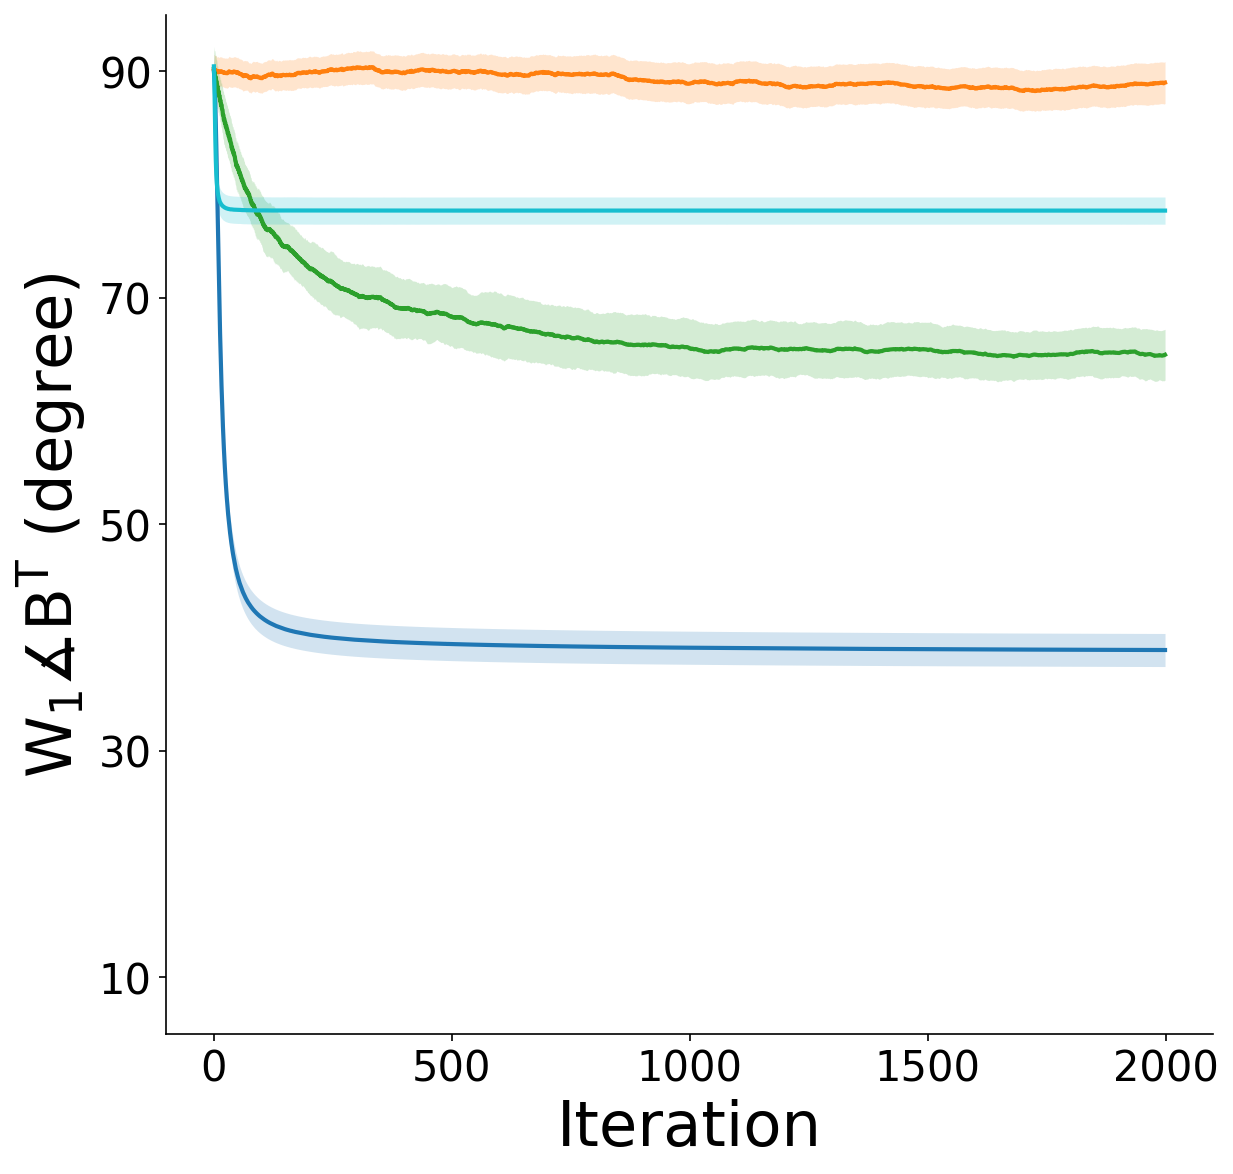

In [ ]:
N_epoch = len(angle_W1_B_fixed_E[0])


plt.figure(num = None, figsize=(9,9) , dpi=150, facecolor='w', edgecolor='k')

j=1
x = torch.tensor( angle_W1_B_fixed_E )
non_nan_rows = torch.isnan(x).sum(dim = 1) == 0 
x = x[non_nan_rows , :]
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-' , label = r"$Fixed\ E$" , color = my_cycle[j-1] , linewidth=2  )   
x_sem = x.std(dim=0) / np.sqrt(len(angle_W1_B_fixed_E)) 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1


x = torch.tensor( angle_W1_B_list_random_E )
non_nan_rows = torch.isnan(x).sum(dim = 1) == 0 
x = x[non_nan_rows , :]
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-' , label = r"$Each\ iter.\ reinit.\ E\ with\ \mathcal{N}(0,1)$"  , color = my_cycle[j-1]  , linewidth=2  )   
x_sem = x.std(dim=0)/ np.sqrt(len(angle_W1_B_list_random_E)) 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1


x = torch.tensor( angle_W1_B_list_2_it_random_E )
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-' , label = r"$2\ iter.\ reinit.\ E\ with\ \mathcal{N}(0,1)$" , color = my_cycle[j-1]  , linewidth=2  )   
x_sem = x.std(dim=0)
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1


j=j+1

j=j+1
x = torch.tensor( angle_W1_B_list_B_X_E_N_0d5_1 )
non_nan_rows = torch.isnan(x).sum(dim = 1) == 0 
x = x[non_nan_rows , :]
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-' , label = r"$Each\ iter.\ reinit.\ E,X\ with\ \mathcal{N}(0.5,1)$" , color = my_cycle[j-1] , linewidth=2  )   
x_sem = x.std(dim=0)/ np.sqrt(len(angle_W1_B_list_B_X_E_N_0d5_1)) 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1






plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$W_1 \measuredangle B^T \ (degree)$", fontsize= plt_fontsize_label_)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(5,95)
plt.yticks([10,30,50,70,90])


plt.savefig( base_directory_figure_str + '/figure3_angle_W_B.jpg'
 , dpi=300 , bbox_inches='tight' ) 

plt.show()



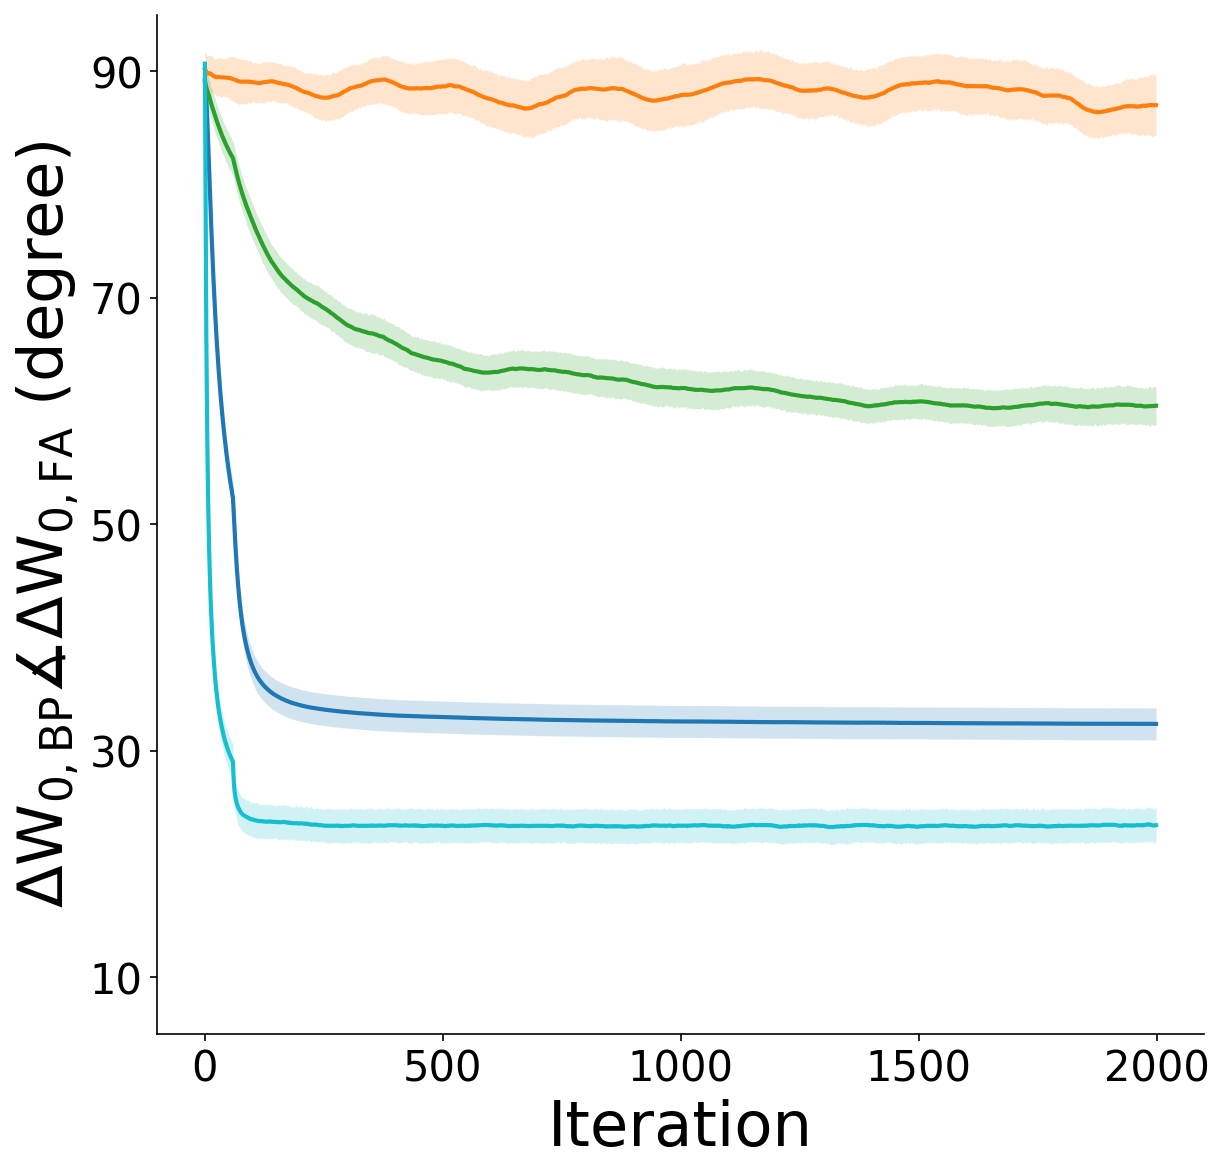

In [ ]:

plt.figure(num = None, figsize=(9,9) , dpi=150, facecolor='w', edgecolor='k')

j=1
x = torch.tensor( angle_dW0_bp_dW0_fa_list_fixed_E )
x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

x_mean = x.mean(dim=0) 
filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
plt.plot( filtered_mean  , '-' , label = r"$Fixed\ E$" , color = my_cycle[j-1] , linewidth=2 )   
x_sem = x.std(dim=0)/ np.sqrt(len(angle_dW0_bp_dW0_fa_list_fixed_E)) 
plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1


x = torch.tensor( angle_dW0_bp_dW0_fa_list_random_E)
x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]
  

x_mean = x.mean(dim=0) 
filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
plt.plot( filtered_mean  , '-' , label = r"$Each\ iter.\ reinit.\ E$"  , color = my_cycle[j-1] , linewidth=2 )   
x_sem = x.std(dim=0)/ np.sqrt(len(angle_dW0_bp_dW0_fa_list_random_E)) 
plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1


x = torch.tensor( angle_dW0_bp_dW0_fa_list_2_it_random_E )
x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

x_mean = x.mean(dim=0) 
filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)

plt.plot( filtered_mean  , '-' , label = r"$2\ iter.\ reinit.\ E$" , color = my_cycle[j-1] , linewidth=2 )   
x_sem = x.std(dim=0)/ np.sqrt(len(angle_dW0_bp_dW0_fa_list_2_it_random_E)) 
plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1



j=j+1
j=j+1

x = torch.tensor( angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1 )
x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

x_mean = x.mean(dim=0) 
filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)

plt.plot( filtered_mean  , '-' , label = r"$Each\ ite.\ reinit.\ E,X$" , color = my_cycle[j-1] , linewidth=2  )   
x_sem = x.std(dim=0)/ np.sqrt(len(angle_dW0_bp_dW0_fa_list_B_X_E_N_0d5_1)) 
plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)  
j=j+1








plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Delta W_{0,BP} \measuredangle \Delta W_{0,FA} \ (degree)$", fontsize= plt_fontsize_label_)



ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(5,95)
plt.yticks([10,30,50,70,90])

plt.savefig(base_directory_figure_str + '/figure3_angle_dw_bp_fa.jpg' , dpi=300  , bbox_inches='tight') 

plt.show()



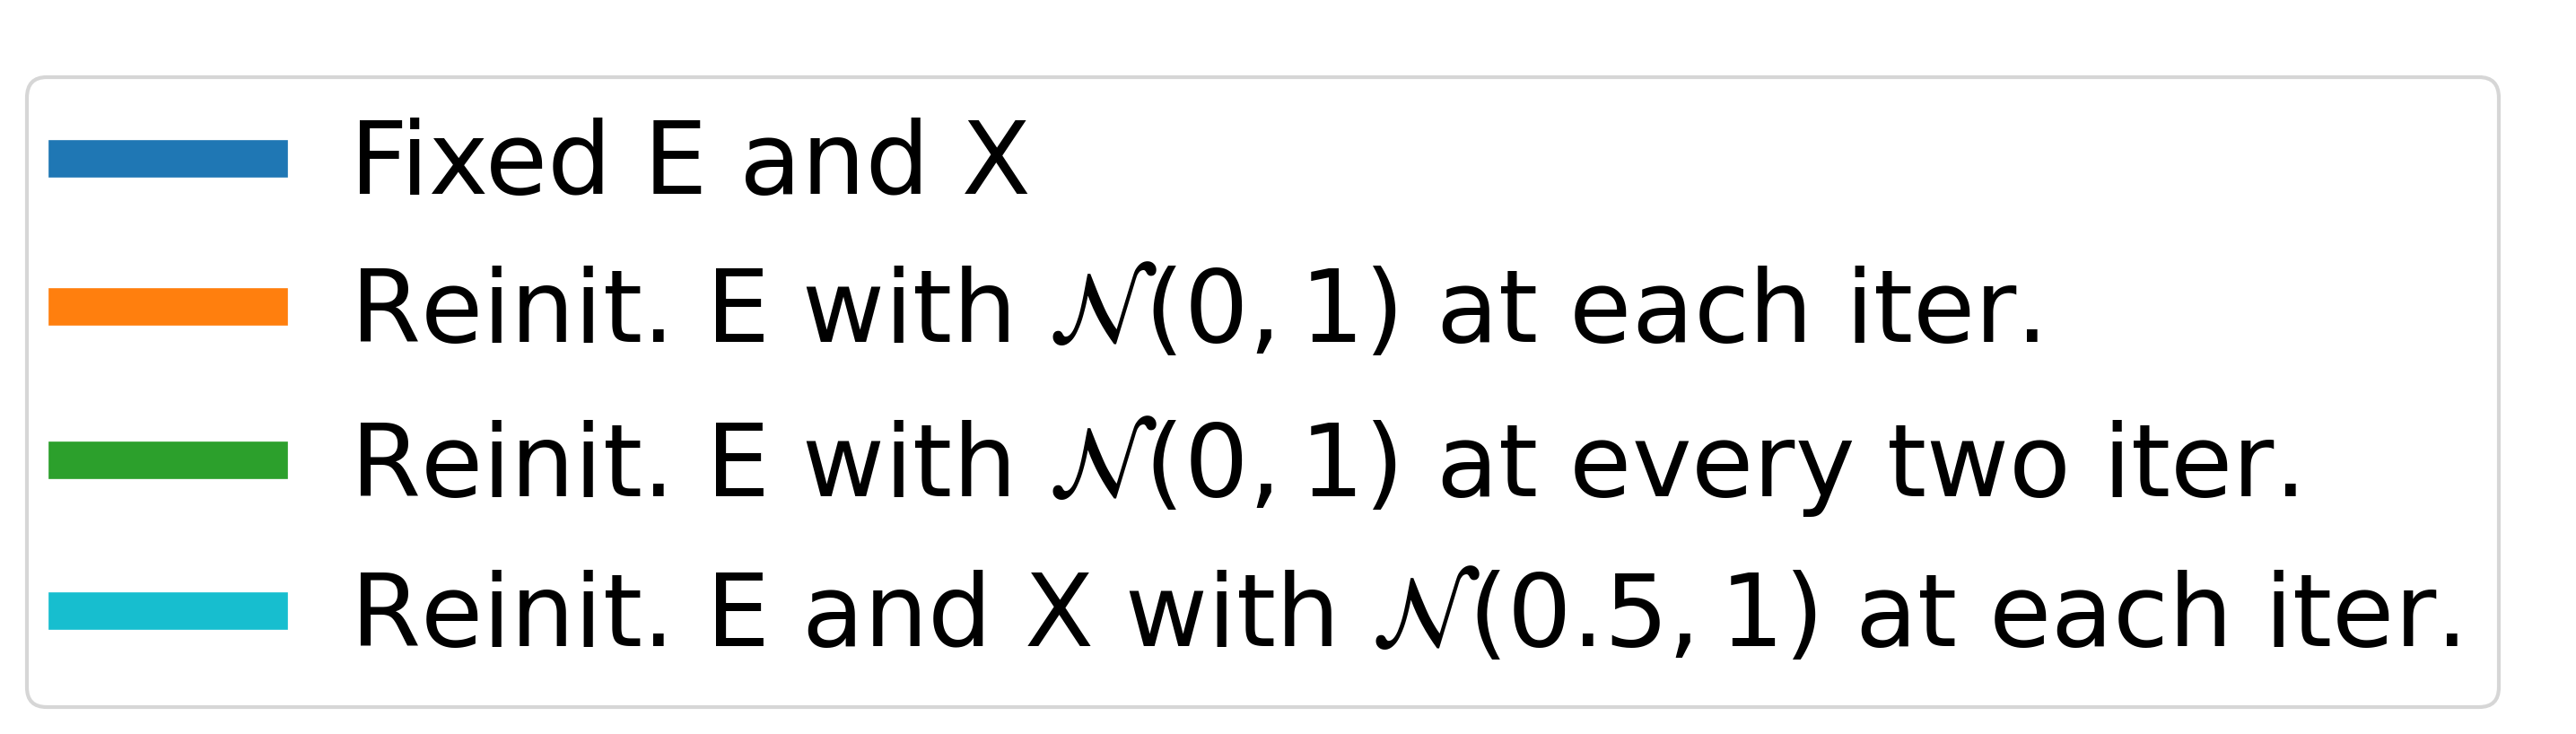

In [ ]:

# plot legend



plt.figure(num = None, figsize=(1,1) , dpi=300, facecolor='w', edgecolor='k')



plt.plot(  [0]  , '-' , label = r"Fixed E and X" , color = my_cycle[0] )   
plt.plot(  [0]   , '-' , label = r"Reinit. E with $\mathcal{N}(0,1)$ at each iter."  , color = my_cycle[1] )  
plt.plot(  [0]   , '-' , label = r"Reinit. E with $\mathcal{N}(0,1)$ at every two iter." , color = my_cycle[2]  )   
plt.plot( [0]    , '-' , label = r"Reinit. E and X with $\mathcal{N}(0.5,1)$ at each iter." , color = my_cycle[5] )  

 


leg =  plt.legend(  fontsize = plt_fontsize_legend_   , markerscale=5 ,ncol=1 )

for line in leg.get_lines():
    line.set_linewidth(10)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[ -4 ,-4 ,4,40]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + '/legend.jpg' )



plt.show()
